In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import pandas_profiling as pp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\Datasets\Train_test_linux\Train_Test_Linux_memory.csv")
#profile=pp.ProfileReport(df)
#profile.to_file("linux_memory.html")

In [3]:
df.drop(['ts','type'],axis=1,inplace=True)

label_encoder=preprocessing.LabelEncoder()
df['CMD']=label_encoder.fit_transform(df['CMD'])
#df['type']=label_encoder.fit_transform(df['type'])

x=df.loc[:,['PID','MINFLT','MAJFLT','VSTEXT','VSIZE','RSIZE','VGROW','RGROW','MEM','CMD']] # input
y=df.loc[:,['label']] # target

# splitting thee dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [4]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

98078 42034 98078 42034


In [4]:
gnb=GaussianNB()
model=gnb.fit(x_train,y_train.values.ravel())
y_pred=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print([y_test, y_pred])

#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))



Accuracy:  0.075415140124661
Recall:  0.075415140124661
F1score:  0.044968349422596414


In [5]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train.values.ravel())
y_pred=mnb.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred,average="weighted"))
print("F1 score: ",f1_score(y_test,y_pred,average="weighted"))

Accuracy:  0.37091402198220486
Recall:  0.37091402198220486
F1 score:  0.4330597382274439


In [4]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rfc.fit(x_train,y_train.values.ravel())
# y_pred=rfc.predict(x_test)
# # print(y_test)
# # print(y_pred)
# print("Accuracy: ",accuracy_score(y_test,y_pred))
# #print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
# print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
# print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

RandomForestClassifier(max_depth=10, random_state=42)

In [6]:
y_pred = rfc.predict(x_test)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Plot the classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Confusion matrix:
[[29772   161]
 [  232 11869]]
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29933
           1       0.99      0.98      0.98     12101

    accuracy                           0.99     42034
   macro avg       0.99      0.99      0.99     42034
weighted avg       0.99      0.99      0.99     42034



AttributeError: module 'matplotlib' has no attribute 'xlabel'

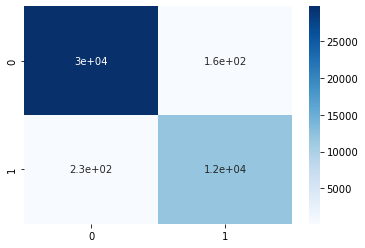

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

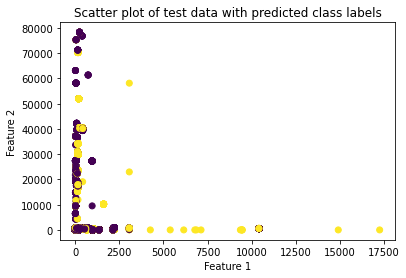

In [15]:
plt.scatter(x_test['VSTEXT'], x_test['VSIZE'], c=y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of test data with predicted class labels')
plt.show()

KeyError: 'target'

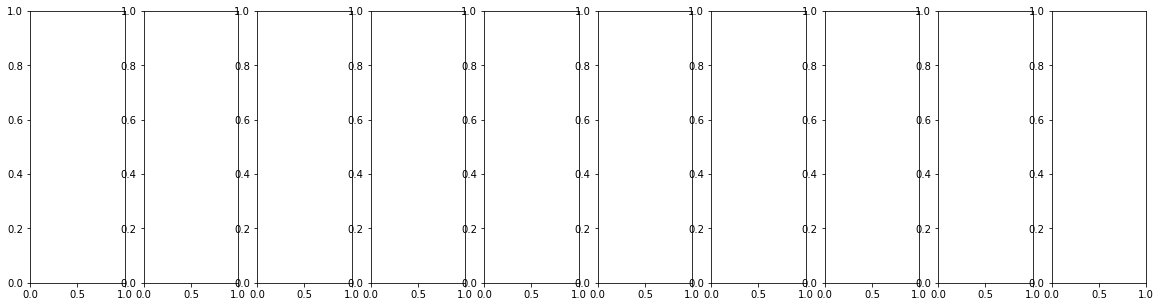

In [17]:
# Separate the target variable from the features
# X = dataset.drop('target', axis=1)
# y = dataset['target']

# # Initialize random forest classifier
# clf = RandomForestClassifier()

# # Fit the classifier to the data
# clf.fit(X, y)

# Predict the target values for the data
# y_pred = clf.predict(X)

# Create a box plot for multiple features across different target classes
fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(20, 5))
for ax, column in zip(axes, x.columns):
    df.boxplot(column=[column], by='target', ax=ax)
    ax.set_xlabel('Target Class')
    ax.set_ylabel(column)
    ax.set_title(f'Box Plot of {column} by Target Class')
plt.show()


In [7]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100, random_state=42, max_depth=10)
xgb_classifier.fit(x_train,y_train.values.ravel())
y_pred=xgb_classifier.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

Accuracy:  0.9843460056145026
Recall:  0.9843460056145026
F1score:  0.9843021195894134


In [10]:
model = MLPClassifier(max_iter=300, random_state=42)
model.fit(x_train, y_train.values.ravel())
y_pred=model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

Accuracy:  0.8292810581909883
Recall:  0.8292810581909883
F1score:  0.823309293489015


In [4]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
# Train Adaboost Classifer
model1 = abc.fit(x_train, y_train.values.ravel())
#Predict the response for test dataset
y_pred = model1.predict(x_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
#print("Precision: ",precision_score(y_test,y_pred,average='weighted'))
print("Recall: ",recall_score(y_test,y_pred,average='weighted'))
print("F1score: ",f1_score(y_test,y_pred,average='weighted'))

Accuracy:  0.776942475139173
Recall:  0.776942475139173
F1score:  0.7411787527205591
